In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from lmfit.models import VoigtModel,PseudoVoigtModel, LinearModel
from scipy import stats
from scipy.signal import savgol_filter
plt.rcParams["figure.figsize"] = (20,10)


def multi():
    E=210000
    v=0.3
    theta2=156
    theta2/=2
    V=2.0*(1.0+v)
    theta = np.radians(theta2)
    theta = np.tan(theta)
    theta = 1.0/theta
    theta *= (np.pi/180.0)
    theta *=E
    theta /=-1.0*V
    ##    return theta/9.8#kg
    return theta#Mpa

#return novot
def removekalpha(y,x):
    novoy=[]
    lambida2=1.541220
    lambida1=1.537400
    deltaL = lambida2 - lambida1
    deltaL = deltaL/lambida1
    diferenca=x[1]-x[0]

    for i in range(len(y)):
        deltasoma = x[1]-x[0]
        ase= np.tan(np.radians(x[i]/2))*2*deltaL/(diferenca)
        n=1;

        while(ase>deltasoma):
            deltasoma=deltasoma+diferenca
            n+=1
        try:
            yy=y[i]-0.5*y[i-n]

            if yy<0:yy=(yy+y[i])/8

            novoy.append(yy)
        except:
            novoy.append(y[i])

    return novoy

#return y
def background(y):
    minimo=min(y)
    for i in range(len(y)):
        y[i]-=minimo
    return y

#return y
def normalizar(y):
    minimo=max(y)
    for i in range(len(y)):
        y[i]/=minimo
    return y

def removerzero(vetor):
    for key, value in enumerate(vetor):
        if value <0:
            vetor[key]=0

    for key,value in enumerate(vetor):
        try:
            if vetor[key+1]==0 and value >0:
                vetor[key]=0
        except:
            pass
    return vetor

def read_file(file_name):
    psi=0
    r = open(file_name,'r',encoding = "ISO-8859-1")
    print('ok')
    printar = False
    vx = []
    vy = []
    print(r)
    for i in r:
        print(i)
        if printar:
            print(i)
            value = i.split(' ')
            x=value[3]
            x = float(x)
            vx.append(x)
            y=value[-1].split('\n')[0]
            y =float(y)
            vy.append(y)
        if not printar and '<2Theta>   <   I   >' in i:
            printar = True
        if not printar and 'psi angle' in i:
            value = i.split(' ')
            psi=float(value[-3])
            psi=np.sin(np.radians(psi))**2

    vx = np.asarray(vx)
    vy = np.asarray(vy)
    return psi, vx, vy

def removerbackground(x,y,m=5):

    minimo= np.mean( np.sort(y)[:10])
    for i in range(len(y)):
        y[i]=y[i]-minimo
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.append(x[:m],x[-m:]),np.append(y[:m],y[-m:]))
    abline_values = [slope * i + intercept for i in x]
    abline_values=np.asarray(abline_values)
    return removerzero(y-abline_values)


def processing_of_data(x,y):
    y = normalizar(y)
    y = background(y)
    y = removerbackground(x,y)
    #y = removekalpha(x,y)
    #pdb.set_trace()
    y = savgol_filter(y, 5, 2)
    
    y = normalizar(y)

    return x,y

def center_psi(file_name):
    psi, vx, vy = read_file(file_name)
    vx, vy = processing_of_data(vx,vy)
    legenda = file_name.split('/')[-1]
    plt.grid()
    plt.legend(loc=0)
    plt.plot(vx,vy,label=legenda)
    mod = PseudoVoigtModel()
    y=vy
    pars = mod.guess(y, x=vx)
    out  = mod.fit(y, pars, x=vx)
    center =out.best_values['center']
    return psi, center

def lenar_calc(x,y):
    mod = LinearModel()
    pars = mod.guess(y, x=x)
    out  = mod.fit(y, pars, x=x)
    calc= out.best_values['slope']
    stress=calc*multi()
    stress=round(stress,3)
    #plt.plot(x,out.bes_fit)
    print(out)
    return stress, x , out.best_fit
    #print(out.best_values)

No handles with labels found to put in legend.


Start
ok
<_io.TextIOWrapper name='popb/Po_PB_7,2_/Po_PB_7,2_.txt' mode='r' encoding='ISO-8859-1'>
/////////////////////////////////////////////////////////////////////////////////

/// Profile Data Ascii Dump (XRD)                                             ///

/////////////////////////////////////////////////////////////////////////////////



  Group     : Stress3

  Data      : Po_PB_7,2_

  File Name : Po_PB_7,2_.RAW



# Profile Datafile

          comment             = Calibração Pó 

          date & time         = 06-21-17 13:49:54 



# Measurement Condition

    X-ray tube

          target              = Cr 

          voltage             = 30.0 (kV)

          current             = 30.0 (mA)

    Slits

          divergence slit     = 0.40000 (mm)  

          scatter slit        = 0.00000 (deg) 

          receiving slit      = 0.40000 (mm)  

    Scanning

          drive axis          = Theta-2Theta 

          scan range          =  152.000 -  162.000 

          scan


   152.8000      4414

   152.9000      4564

   152.9000      4564

   153.0000      4550

   153.0000      4550

   153.1000      4724

   153.1000      4724

   153.2000      4632

   153.2000      4632

   153.3000      4734

   153.3000      4734

   153.4000      4696

   153.4000      4696

   153.5000      4864

   153.5000      4864

   153.6000      5100

   153.6000      5100

   153.7000      4910

   153.7000      4910

   153.8000      5250

   153.8000      5250

   153.9000      5398

   153.9000      5398

   154.0000      5328

   154.0000      5328

   154.1000      5656

   154.1000      5656

   154.2000      5648

   154.2000      5648

   154.3000      5730

   154.3000      5730

   154.4000      5950

   154.4000      5950

   154.5000      6284

   154.5000      6284

   154.6000      6452

   154.6000      6452

   154.7000      6644

   154.7000      6644

   154.8000      6638

   154.8000      6638

   154.9000      7088

   154.9000      7088

   155.000

   155.4000      8570

   155.4000      8570

   155.5000      8804

   155.5000      8804

   155.6000      9016

   155.6000      9016

   155.7000      9174

   155.7000      9174

   155.8000      9306

   155.8000      9306

   155.9000      9314

   155.9000      9314

   156.0000      9650

   156.0000      9650

   156.1000      9726

   156.1000      9726

   156.2000      9580

   156.2000      9580

   156.3000      9528

   156.3000      9528

   156.4000      9476

   156.4000      9476

   156.5000      9366

   156.5000      9366

   156.6000      9464

   156.6000      9464

   156.7000      9206

   156.7000      9206

   156.8000      8990

   156.8000      8990

   156.9000      9000

   156.9000      9000

   157.0000      8544

   157.0000      8544

   157.1000      8440

   157.1000      8440

   157.2000      8434

   157.2000      8434

   157.3000      8114

   157.3000      8114

   157.4000      7994

   157.4000      7994

   157.5000      7814

   157.5000

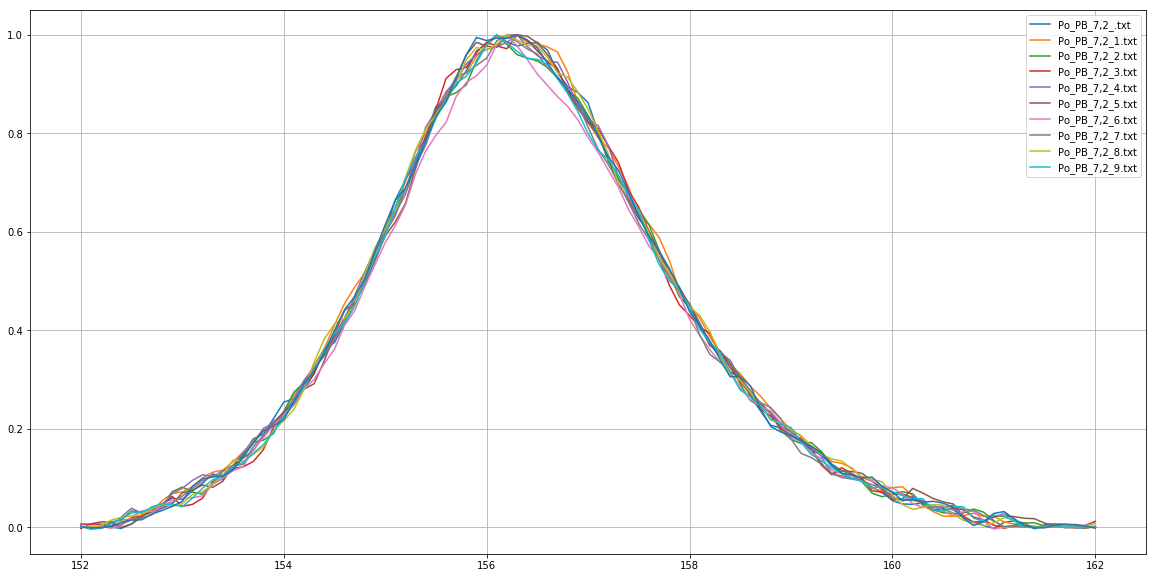

In [47]:
center_list =[]
psi_list =[]

print('Start')

dados='Po_PB_7,2'

file_names=[]
file_names.append('popb/Po_PB_7,2_/Po_PB_7,2_.txt')

for i in range(1,11):
    file_name='popb/{}_{}/{}_{}.txt'.format(dados,str(i),dados,str(i))
    #print(file_name)
    file_names.append(file_name)

#for file_name in file_names:
#    print(file_name)
#pdb.set_trace()

for file_name in file_names:
    #print(file_name)
    psi, center = center_psi(file_name)
    psi_list.append(psi)
    center_list.append(center)
plt.show()

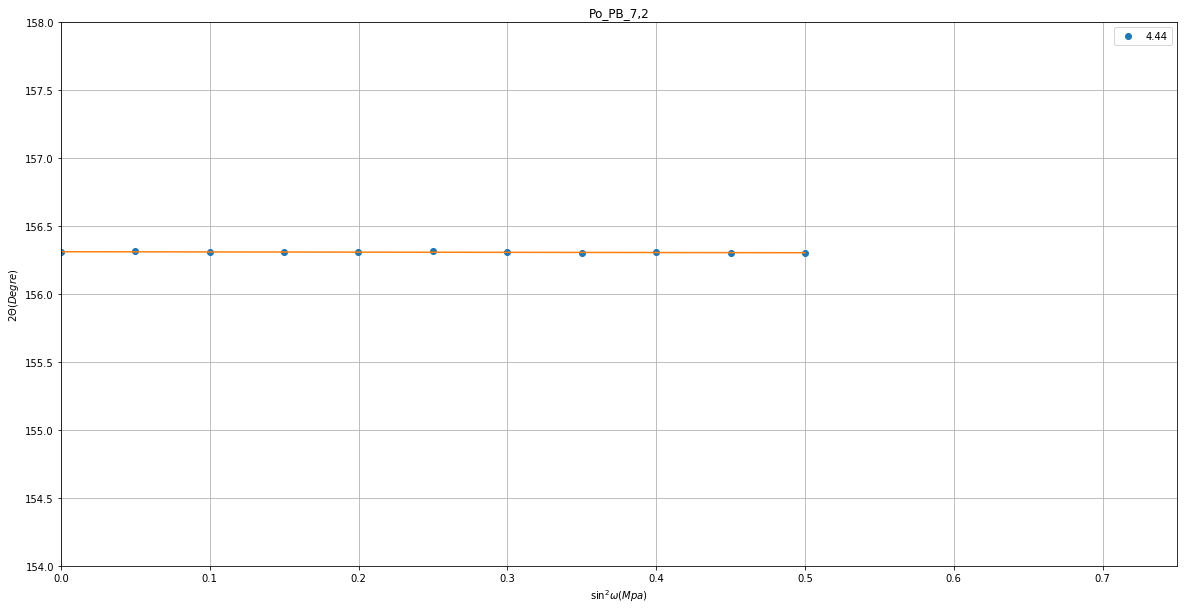

In [48]:
miny=int(min(center_list))-2
maxy=int(max(center_list))+2
maxx=round(max(psi_list),3)+round(max(psi_list),3)/2
plt.axis([0,maxx,miny,maxy])

plt.grid()
plt.title(dados)
plt.xlabel('$\sin ^{2}\omega (Mpa)$')
plt.ylabel('$2\Theta (Degre)$')
legenda ,x,bestY= lenar_calc(psi_list,center_list)
#plt.legend(legenda)
plt.plot(psi_list,center_list,'o',label=(legenda))
plt.plot(x,bestY)
plt.legend(loc=0)
plt.show()

In [44]:
legenda

14.119